In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Basic Statistics

In [3]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  50000
Number of columns:  2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

from the above, we can confirm that the data is equally partioned.

### Data Cleaning and preprocessing

In [6]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In the above data we can see \<br>\ break tags. We need to remove them before using this data.  

In [7]:
from bs4 import BeautifulSoup
cleantext = BeautifulSoup(data["review"][1], 'lxml').text
cleantext

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

We need to remove the slash 

In [8]:
import re
cleantext = re.sub(r'[^\w\s]', '', cleantext)
cleantext

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [9]:
import nltk
from nltk.corpus import stopwords


In [10]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\AMIZING/nltk_data'
    - 'c:\\Users\\AMIZING\\anaconda3\\nltk_data'
    - 'c:\\Users\\AMIZING\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\AMIZING\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\AMIZING\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [16]:
token = cleantext.lower().split()
stopword = set(stopwords.words('english'))
token_list = [ word for word in token if word.lower() not in stopword ]

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\AMIZING/nltk_data'
    - 'c:\\Users\\AMIZING\\anaconda3\\nltk_data'
    - 'c:\\Users\\AMIZING\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\AMIZING\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\AMIZING\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [17]:
" ".join(token_list)

NameError: name 'token_list' is not defined

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [18]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
lemmatizer.lemmatize(" ".join(token_list))

NameError: name 'token_list' is not defined

In [20]:
data.keys()

Index(['review', 'sentiment'], dtype='object')

In [46]:
from tqdm import tqdm
def data_cleaner(data):
    clean_data = []
    for review in tqdm(data):
        cleantext = BeautifulSoup(review, "lxml").text
        cleantext = re.sub(r'[^\w\s]', '', cleantext)
        clean_data.append(cleantext.strip())
    return clean_data

In [24]:
clean_data = data_cleaner(data.review.values)

100%|██████████| 50000/50000 [00:19<00:00, 2521.38it/s]


In [25]:
clean_data[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

### Train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.sentiment, test_size=0.2, random_state=42, stratify=data.sentiment)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 2) (40000,)
(10000, 2) (10000,)


In [29]:
clean_data_train_data = data_cleaner(X_train.review.values)

100%|██████████| 40000/40000 [00:14<00:00, 2797.81it/s]


In [30]:
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

,review,sentiment,cleaned_text
47808,I caught this little gem totally by accident b...,positive,I caught this little gem totally by accident b...
20154,I can't believe that I let myself into this mo...,negative,I cant believe that I let myself into this mov...
43069,*spoiler alert!* it just gets to me the nerve ...,negative,spoiler alert it just gets to me the nerve som...
19413,If there's one thing I've learnt from watching...,negative,If theres one thing Ive learnt from watching G...
13673,"I remember when this was in theaters, reviews ...",negative,I remember when this was in theaters reviews s...


In [31]:
clean_data_test_data = data_cleaner(X_test.review.values)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

100%|██████████| 10000/10000 [00:03<00:00, 2772.74it/s]


,review,sentiment,cleaned_text
18870,"Yes, MTV there really is a way to market Daria...",negative,Yes MTV there really is a way to market Daria ...
39791,The story of the bride fair is an amusing and ...,negative,The story of the bride fair is an amusing and ...
30381,"A team varied between Scully and Mulder, two o...",positive,A team varied between Scully and Mulder two ot...
42294,This was a popular movie probably because of t...,negative,This was a popular movie probably because of t...
33480,This movie made me so angry!! Here I am thinki...,negative,This movie made me so angry Here I am thinking...


### Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [34]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(40000, 192272)
(10000, 192272)


### Naive Bayes with Hyperparameter Tuning

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [36]:
classifier = MultinomialNB()

In [37]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [38]:
grid_search = GridSearchCV(classifier, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100]},
             return_train_score=True, scoring='accuracy')

In [40]:
alpha = [0.001, 0.01, 0.1, 1, 10.0, 100]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']


In [41]:
import matplotlib.pyplot as plt

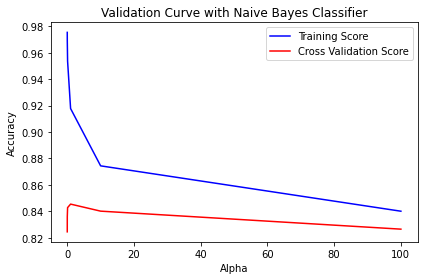

In [42]:
plt.plot(alpha, train_acc, label="Training Score", color='b')
plt.plot(alpha, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [43]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

In [44]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow, y_train)


MultinomialNB(alpha=1)

In [45]:
predict = classifier.predict(test_x_bow)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, predict))

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy is ", classification_report(y_test, predict))

### Some Testing

In [ ]:
text = ["I liked the movie. It was great"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

In [ ]:
le.inverse_transform([1])

In [ ]:
text = ["Movie was worse"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

In [ ]:
le.inverse_transform([0])

### Save Model and Vector

In [ ]:
from joblib import dump
dump(vec, 'vectors.joblib')
dump(classifier, 'classifier.joblib')
